In [1]:
import re
import nltk
nltk.download('punkt')
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Warren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data1 = pd.read_csv("C:\\Users\\Warren\\Dropbox\\My PC (LAPTOP-RE30J1TP)\\Desktop\\Projects\\Email Spam Filtering\\dataset\\lingSpam.csv")
data2 = pd.read_csv("C:\\Users\\Warren\\Dropbox\\My PC (LAPTOP-RE30J1TP)\\Desktop\\Projects\\Email Spam Filtering\\dataset\enronSpamSubset.csv")
data3 = pd.read_csv("C:\\Users\\Warren\\Dropbox\\My PC (LAPTOP-RE30J1TP)\\Desktop\\Projects\\Email Spam Filtering\\dataset\completeSpamAssassin.csv")

In [3]:
data1.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [4]:
data2.head()

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [5]:
data3.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [6]:
data1.drop("Unnamed: 0",inplace=True,axis=1)
data2.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
data3.drop("Unnamed: 0",inplace=True,axis=1)

In [7]:
data2.head()

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [8]:
data = pd.concat([data1,data2,data3],axis=0)

In [9]:
data.head()

,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18651 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18651 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18650 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18650 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


In [13]:
data2 = data
email_length = []

for email in data2['Body']:
    email_length.append(len(email))
    
data2['Email length'] = email_length

In [14]:
special_characters = []

for email in data2['Body']:
    special_characters_counter = 0
    for char in email:
        if not char.isalnum():
            special_characters_counter+=1
    special_characters.append(special_characters_counter)
        
data2['Special characters'] = special_characters

In [15]:
digits = []

for email in data2['Body']:
    digits_counter = 0
    for char in email:
        if char.isdigit():
            digits_counter+=1
    digits.append(digits_counter)
            
            
data2['Digits'] = digits

In [16]:
data2.head()

,Body,Label,Email length,Special characters,Digits
0,Subject: great part-time or summer job !\n \n ...,1,1836,959,34
1,Subject: auto insurance rates too high ?\n \n ...,1,1252,295,11
2,Subject: do want the best and economical hunti...,1,684,196,33
3,Subject: email 57 million people for $ 99\n \n...,1,5234,2013,151
4,Subject: do n't miss these !\n \n attention ! ...,1,6652,2503,157


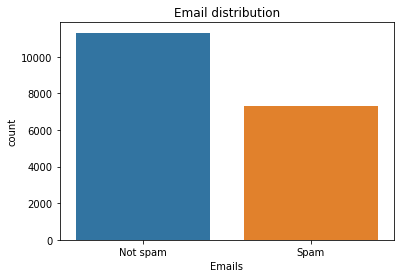

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Label',data=data2)
plt.title('Email distribution')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

In [18]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

data2['Email length'].describe()

count      18650
mean        2776
std       125173
min            1
25%          417
50%          896
75%         1905
max     17085626
Name: Email length, dtype: float64

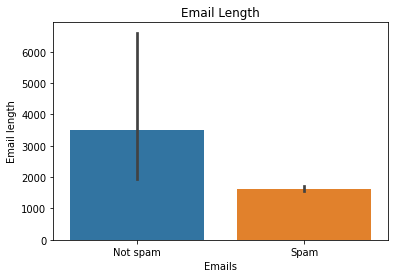

In [19]:
import seaborn as sns
sns.barplot(x='Label',y='Email length',data=data2)
plt.title('Email Length')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

In [20]:
data2['Special characters'].describe()

count     18650
mean        751
std       35010
min           0
25%         107
50%         242
75%         515
max     4779145
Name: Special characters, dtype: float64

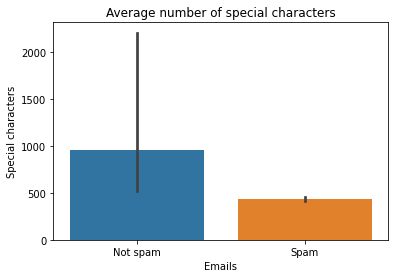

In [21]:
sns.barplot(x='Label',y='Special characters',data=data2)
plt.title('Average number of special characters')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

In [22]:
data2['Digits'].describe()

count    18650
mean        62
std       2714
min          0
25%          4
50%         17
75%         41
max     369911
Name: Digits, dtype: float64

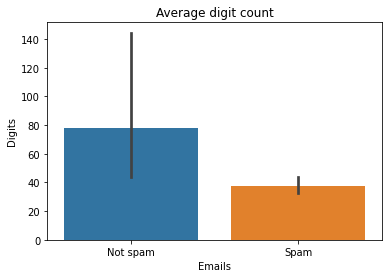

In [23]:
sns.barplot(x='Label',y='Digits',data=data2)
plt.title('Average digit count')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

In [24]:
x = data["Body"]
x_clnd_link = [re.sub(r"http\S+", "", text) for text in x]

print(x_clnd_link[0])

Subject: great part-time or summer job !
 
 * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1-888 

In [25]:
pattern = "[^a-zA-Z0-9]"

In [26]:
x_cleaned = [re.sub(pattern," ",text) for text in x_clnd_link]

In [27]:
x_lowered = [text.lower() for text in x_cleaned]
print(x_lowered[0])

subject  great part time or summer job                                    we have display boxes with credit applications that we need to place in the small owner operated stores in your area   here is what you do   1   introduce yourself to the store owner or manager   2   use our 90   effective script which tells them how this little display box will save their customers hundreds of dollars   be a drawing card for their business   and make them from   5   00 to   15   00 or more for every app sent in   3   find a good spot on the counter   place the box there   and say that nothing more need be done   all you need is his name and address so the company can send him the commission checks   your compensaation will be   10 for every box you place   by becoming a representative you could also earn a commission of   10 for each application that came from that store   that is of course a much more profitable plan   as it will pay you for months or years for a very small effort   call 1 888 

In [28]:
x_tokenized = [nltk.word_tokenize(text) for text in x_lowered]

In [29]:
print(x_tokenized[0])

['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'boxes', 'with', 'credit', 'applications', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'stores', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', '1', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', '2', 'use', 'our', '90', 'effective', 'script', 'which', 'tells', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customers', 'hundreds', 'of', 'dollars', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', '5', '00', 'to', '15', '00', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', '3', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'checks', 'yo

In [30]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Warren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]

In [32]:
print(x_lemmatized[0])

['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'box', 'with', 'credit', 'application', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'store', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', '1', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', '2', 'use', 'our', '90', 'effective', 'script', 'which', 'tell', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customer', 'hundred', 'of', 'dollar', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', '5', '00', 'to', '15', '00', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', '3', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'check', 'your', 'com

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Warren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stopwords = nltk.corpus.stopwords.words("english")
x_prepared = [[word for word in text if word not in stopwords] for text in x_lemmatized]

In [35]:
print(x_prepared[0])

['subject', 'great', 'part', 'time', 'summer', 'job', 'display', 'box', 'credit', 'application', 'need', 'place', 'small', 'owner', 'operated', 'store', 'area', '1', 'introduce', 'store', 'owner', 'manager', '2', 'use', '90', 'effective', 'script', 'tell', 'little', 'display', 'box', 'save', 'customer', 'hundred', 'dollar', 'drawing', 'card', 'business', 'make', '5', '00', '15', '00', 'every', 'app', 'sent', '3', 'find', 'good', 'spot', 'counter', 'place', 'box', 'say', 'nothing', 'need', 'done', 'need', 'name', 'address', 'company', 'send', 'commission', 'check', 'compensaation', '10', 'every', 'box', 'place', 'becoming', 'representative', 'could', 'also', 'earn', 'commission', '10', 'application', 'came', 'store', 'course', 'much', 'profitable', 'plan', 'pay', 'month', 'year', 'small', 'effort', 'call', '1', '888', '703', '5390', 'code', '3', '24', 'hour', 'receive', 'detail', 'removed', 'mailing', 'list', 'type', 'b2998', 'hotmail', 'com', 'area', 'remove', 'subject', 'area', 'new',

In [59]:
import pickle
with open('x_list.pkl','wb') as f:
    pickle.dump(x_prepared,f)

In [60]:
data.to_csv('final_data.csv')